# Proposal

## Title : Using Resting Blood Pressure and Maximum Heart Rate to Diagnose Heart Disease in Patients from Cleveland.

## Introduction:
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question

## Preliminary exploratory data analysis:
1. Demonstrate that the dataset can be read from the web into R 
2. Clean and wrangle your data into a tidy format
3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

## Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

## Expected outcomes and significance:
We expect to find a correlation that those with high blood pressure and low maximum heart rate are more likely to get diagnosed with heart disease. Such findings could help medical practitioners prevent such diseases by realizing the signs much earlier in patients' lives, and could work on developing treatments on lowering resting blood pressure and increasing maximum heart rate to improve heart health. 

Future questions that this may introduce would be:
1) Which of the two factors has a greater impact on the probability of people being diagnosed with heart disease?
2) What treatments could be invented to prevent heart disease from developing?
3) How many people currently in Cleveland are at a risk for heart disease, based on these two variables?
4) How would these results change based if other traits are factored in?


# Preliminary exploratory data analysis:

## Step 1 : Load Libraries

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Step 2 : Read Data + Split into training & testing set

In [3]:
set.seed(123)
#read data
url<-"https://raw.githubusercontent.com/gracieS02/group_proposal_data/main/processed.cleveland.data?token=GHSAT0AAAAAACPGZWSBYOQE5DMJQJJQS2SAZPIZ32A"
download.file(url, "processed_cleveland.csv")

#rename columns
cleveland_data <- read_csv("processed_cleveland.csv", 
                           col_name = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#clean and wrangle data
cleveland_data[cleveland_data == "?"] <- NA

cleveland_data <- mutate(cleveland_data, diagnose = ifelse(is.na(num), NA, (num > 0)), diagnose = as.factor(diagnose))

#splitting the dataframe into training and testing sets
cleveland_split <- initial_split(cleveland_data, prop = 3/4, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)


# #sex: 1 = male; 0 = female

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnose
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnose
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,FALSE
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0,FALSE


## Step 3 : Training Data Summary

In [9]:
#number of observations in each group
cleveland_train_summary1 <- cleveland_training |>
         group_by(diagnose) |>
         summarize(counts = n())

#report the mean of cholestoral and blood pressure in each class(diagnoses)
cleveland_train_summary2 <- cleveland_training |>
         group_by(diagnose) |>
         summarize(mean_chol = mean(chol), mean_trestbps = mean(trestbps))

cleveland_train_summary1
cleveland_train_summary2

cleveland_summary <- cleveland_training %>%
                    group_by(diagnose) %>%
                    summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                              n_of_patients = n())

cleveland_summary
     

diagnose,counts
<fct>,<int>
FALSE,122
TRUE,103


diagnose,mean_chol,mean_trestbps
<fct>,<dbl>,<dbl>
FALSE,244.6967,128.9836
TRUE,249.0777,135.4757


diagnose,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_thalach,max_thalach,mean_thalach,min_trestbps,max_trestbps,mean_trestbps,n_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,29,76,52.60656,126,564,244.6967,96,202,157.9918,94,180,128.9836,122
TRUE,38,70,56.94175,131,407,249.0777,71,195,137.2524,108,192,135.4757,103


## Step 4: Visualization

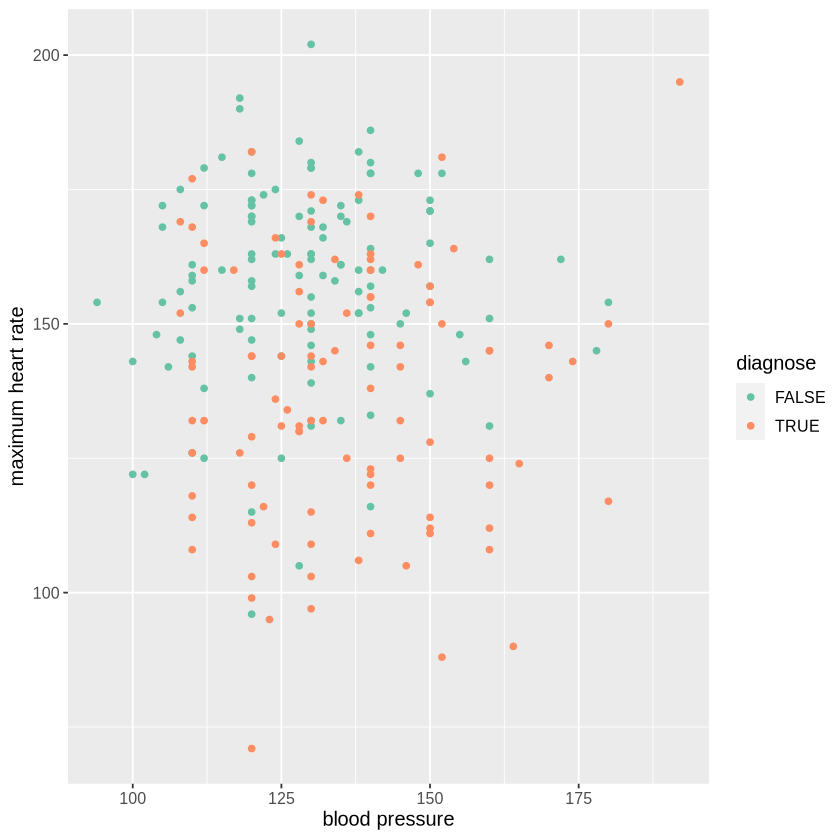

In [10]:
#report the relationship between resting blood pressure and cholestoral
# cleve_plot <- ggplot(cleveland_training, aes(x=trestbps, y=chol, color=diagnose)) +
#       geom_point() +
#       xlab("Resting Blood Pressure (mm Hg) ") +
#       ylab("Serum Cholestoral in mg/dl") +
#       theme(text = element_text(size = 12)) +
#       scale_color_brewer(palette = "Set2")

# cleve_plot

#age vs.chol
cleve_plot <- ggplot(cleveland_training, aes(x=trestbps, y=thalach, color=diagnose)) +
      geom_point() +
      xlab("blood pressure") +
      ylab("maximum heart rate") +
      theme(text = element_text(size = 12)) +
      scale_color_brewer(palette = "Set2")

cleve_plot